In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import fnmatch
from matplotlib import dates
import matplotlib
# font = {'family' : 'DejaVu Sans',
#         'weight' : 'bold',
#         'size'   : 24}

# matplotlib.rc('font', **font)
# # matplotlib.rc('font'=  serif='cm10', weight ='bold',size="30")
# matplotlib.rcParams["savefig.bbox"]  ="tight"
# matplotlib.rcParams["figure.titlesize"]  =24
# matplotlib.rcParams["figure.titleweight"]  ="bold"
# matplotlib.rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# matplotlib.rcParams['axes.linewidth'] = 2 
# matplotlib.rcParams['xtick.major.width'] = 3
# matplotlib.rcParams['axes.linewidth'] = 2 
# matplotlib.rcParams['xtick.major.width'] = 3
# matplotlib.rcParams['ytick.major.width'] = 4
# matplotlib.rcParams['ytick.right'] = True
# matplotlib.rcParams["ytick.major.size"] = 9
# matplotlib.rcParams.update({'legend.fontsize':22})
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)


In [2]:
# navalues =[9999,99999,999.9, 999999.99,99999.9,999999.99, 
#            99.99,99999.99,999.99,99999.99, 99.99000,999999.99,999999.99,99999.99]

In [4]:
low_res_header = ['YEAR', 'DOY','Hour','Scalar_B,nT','Proton_Density N/cm^3','Kp_index',"Dst_index, nT","F10.7_index"]

# Reading Solargeomag_2018_low.txt as a csv file
gdf = pd.read_csv(r"Solargeomag_2018_low.txt" , delim_whitespace=True, skiprows=13, names =low_res_header,#na_values =navalues
                 )


In [5]:
#Convert YEAR< DOY and HOUR to Datetime Correctly
index = pd.to_datetime(gdf["YEAR"] * 100000 + gdf["DOY"] * 100 + gdf["Hour"],
                       ) 

gdf.set_index(index, inplace =True)
gdf["2018-03":"2018-06"]
gdf["UT"]=gdf.index


In [6]:
gdf = pd.read_csv(r"solargeomag_2018_low.txt" , sep ='\s+', skiprows=13, names =low_res_header, na_values =navalues)

index = pd.to_datetime(gdf["YEAR"] * 100000 + gdf["DOY"] * 100 + gdf["Hour"], format="%Y%j%H") #Convert YEAR< DOY and HOUR to Datetime Correctly

gdf.set_index(index, inplace =True)


In [7]:
"Create subplots"
# from matplotlib import pyplot as plt
from matplotlib import dates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
mon1=1

mon2=12
day1=1
day2=31
year=2018

In [8]:
# salu= salu[(salu.UT<9)| (salu.UT>21) ] 
months = dates.MonthLocator() #The matplotlib.ticker.MultipleLocator class is used for setting a tick for every integer
#  multiple of a base within the view interval


monthsFmt = dates.DateFormatter('%b') #Formatting to month form
h_fmt = dates.DateFormatter('%H')##Formatting to hour form
days = dates.DayLocator(interval=10)
dfmt = dates.DateFormatter('%d') ##Formatting to day form
hours =dates.HourLocator(byhour=range(0,24,6))    
mins = dates.MinuteLocator(byminute=None, interval=30)


In [9]:
df = gdf[["Dst_index, nT","F10.7_index"]]
df.to_excel('data_.xlsx')


C:\Users\kanio\AppData\Local\Temp/ipykernel_11344/3772190051.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(x["x"],fontsize= 24)
C:\Users\kanio\AppData\Local\Temp/ipykernel_11344/3772190051.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(x["x"],fontsize= 24)
C:\Users\kanio\AppData\Local\Temp/ipykernel_11344/3772190051.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(np.arange(-110,0,20),fontsize= 24)
C:\Users\kanio\AppData\Local\Temp/ipykernel_11344/3772190051.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(np.arange(60,85,2.5),fontsize= 24)


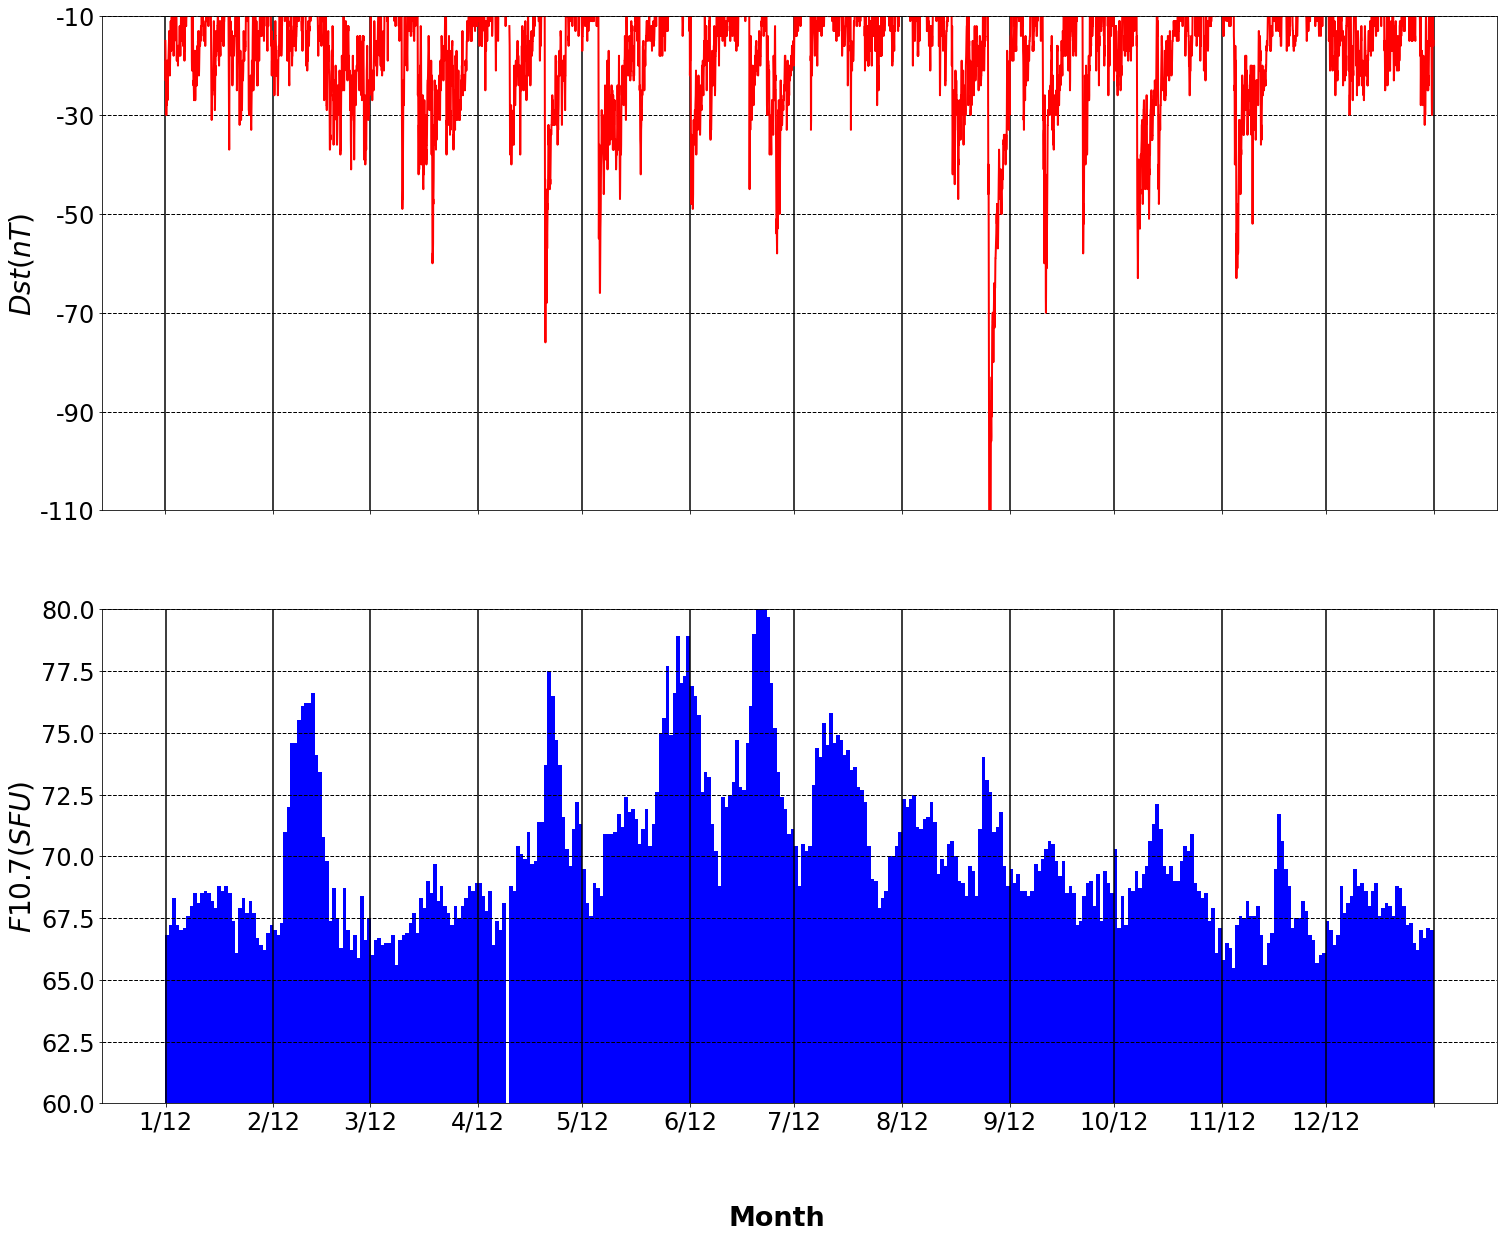

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(25, 20), facecolor='w', edgecolor='k')


axs[1].grid(b=True, which='major', axis='x',linewidth = 1.5, color='black')
axs[1].grid(b=True, which='major', axis='y',linestyle ='--',linewidth = 1, color='black')
axs[1].grid(b=True, which='minor', axis='both',linestyle ='--', linewidth = 1, color='black')
# axs[1].grid(b=True, which='major', axis='x',linewidth = 1.5, color='black')
# axs[1].grid(b=True, which='major', axis='y',linestyle ='--',linewidth = 1, color='black')
# axs[1].grid(b=True, which='minor', axis='both',linestyle ='--', linewidth = 1, color='black')
axs[0].grid(b=True, which='major', axis='x',linewidth = 1.5, color='black')
axs[0].grid(b=True, which='major', axis='y',linestyle ='--',linewidth = 1, color='black')
axs[0].grid(b=True, which='minor', axis='both',linestyle ='--', linewidth = 1, color='black')


# This section of the code is responsible for setting x-axis label on each graph of respective index
axs[1].xaxis.set_major_locator(months)
# axs[1].xaxis.set_major_locator(months)
axs[0].xaxis.set_major_locator(months)


# This section is used for setting label for the y-axis with font size of 26 and making the font bold.
axs[0].set_ylabel("$Dst(nT)$", size=28, weight ='bold')
# axs[1].set_ylabel("$Scalar_B,nT$", size=26, weight ='bold')
axs[1].set_ylabel("$F10.7(SFU)$", size=28, weight ='bold')

# This section of the code is setting range for the y-axis.It takes one argument with a python list of two integers.
axs[0].set_ylim([-100,0])
# axs[1].set_ylim([0,80])
axs[1].set_ylim([60,80])
x = ["1/12","2/12","3/12","4/12","5/12","6/12","7/12","8/12","9/12","10/12","11/12","12/12"]

x = pd.DataFrame(x,columns=["x"])
# This section of the code is for plot the graph. The bar is responsible for plotting bar graph and the plot method is for
# plotting a linear graph.
# axs[1].bar(gdf.index,gdf['Scalar_B,nT'],lw=2,color="yellow")
axs[0].plot(gdf['Dst_index, nT'],lw=2,color="red")   
axs[1].bar(gdf.index, gdf['F10.7_index'],lw=2,width =0.1,color="blue")

axs[0].set_xticklabels(x["x"],fontsize= 24)
# axs[1].set_xticklabels(x["x"],fontsize= 21)
axs[1].set_xticklabels(x["x"],fontsize= 24)

axs[0].set_yticklabels(np.arange(-110,0,20),fontsize= 24)
axs[1].set_yticklabels(np.arange(60,85,2.5),fontsize= 24)

axs[0].tick_params(labelbottom = False)
# axs[1].tick_params(labelbottom = False)

fig.text(0.5, 0.04, 'Month', ha='center',size = 27 ,weight = 'bold')# This line of code is for labeling the x-axis 'Month'.
fig.align_ylabels()
# Saving the graph as a png file(picture)
plt.savefig(str(year)+"imf2.jpg", dpi=500)# this line of code is responsible for saving the graph as an image(png file).
plt.show()# this line of code is responsible for showing the plotted graph to the screen.


In [9]:
gdf.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq=None)